In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/Heart.csv", index_col=0)

train, test = train_test_split(df ,test_size=0.3 ,random_state=123)

train = train.dropna()

X_train = train[["Age","Sex","Chol"]] #Metemos todas las variables excepto AHD
y_train = (train["AHD"]=="Yes").astype("int") #Lo que se quiere predecir

In [ ]:
X_train = X_train.dropna()

In [ ]:
model = DecisionTreeClassifier(max_depth=3)
#Cuando se cambia el argumento va cambiando los datos, buscamos que ambos resultados sean parecidos.
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
model.predict([[21,0,80]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
model.predict_proba([[50,0,80]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[1., 0.]])

In [ ]:
X_train

,Age,Sex,Chol
171,70,1,269
133,29,1,204
137,70,1,174
287,58,0,225
152,42,0,265
...,...,...,...
107,59,1,177
84,68,1,274
18,54,1,239
231,52,0,196


In [ ]:
X_test = test[["Age","Sex","Chol"]]
y_test = (test["AHD"]=="Yes").astype("int")

In [ ]:
y_test

12     0
293    1
270    0
269    1
95     0
      ..
263    0
8      0
163    0
264    0
232    1
Name: AHD, Length: 91, dtype: int64

In [ ]:
model.predict([[56,0,294]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
#Porcetaje de aciertos de el modelo
from sklearn.metrics import accuracy_score

#A VECES ESTE MODELO DA MAL AUN CON LOS DATOS CON LOS QUE SE ENTRENO, ESTO QUIERE DECIR QUE NO SE PUEDE PREDECIR
accuracy_score(y_train, model.predict(X_train)) * 100

accuracy_score(y_test, model.predict(X_test)) * 100

#Cuando supera la referencia que se tiene, el modelo esta bien (Ej: Si nuestro modelo se equivoca menos dque un medico)

60.43956043956044

[Text(0.5769230769230769, 0.875, 'Age <= 54.5\ngini = 0.499\nsamples = 207\nvalue = [109, 98]'),
 Text(0.3076923076923077, 0.625, 'Sex <= 0.5\ngini = 0.43\nsamples = 99\nvalue = [68, 31]'),
 Text(0.15384615384615385, 0.375, 'Chol <= 304.5\ngini = 0.128\nsamples = 29\nvalue = [27, 2]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.46153846153846156, 0.375, 'Chol <= 263.5\ngini = 0.485\nsamples = 70\nvalue = [41, 29]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.452\nsamples = 55\nvalue = [36, 19]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(0.8461538461538461, 0.625, 'Age <= 70.5\ngini = 0.471\nsamples = 108\nvalue = [41, 67]'),
 Text(0.7692307692307693, 0.375, 'Chol <= 413.0\ngini = 0.462\nsamples = 105\nvalue = [38, 67]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.455\nsamples = 103\nvalue = [36, 67]'),
 Text(0.846153

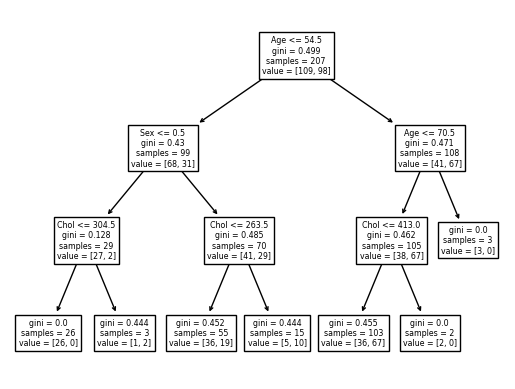

In [ ]:
#Underfiting es que va mal en train
#Overfitting sale bien en train pero mal en test o validacion
from sklearn.tree import plot_tree
plot_tree(model, feature_names=["Age","Sex","Chol"])
#SI hacia la izq en cuanto a las felchitas
#En value se evalua los que tienen ataque al corazon contra los que no, los que tienen a la derecha

In [ ]:
model.predict([[56,0,294]])
model.predict_proba([[56,0,294]])
#La probabilidad que no y la que si
#Para averiguar de donde sale la probablilidad me situo en el nodo del arbol

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.34951456, 0.65048544]])

In [ ]:
#Se usan 3 datasets tarin, validacion (Es lo mismo que el test pero si lo podemos repetir) y test (Solo se puede usar una sola vez para que no se aprenda las respuestas)
#Se utilizan los tres de la siguiente manera, primero se utiliza train para asegurarnos que tenemos un buen modelo, posteriormente se usa validacion para ver como se comporta el
#modelo en varios escenarios, luego contraponemos este resultado al de test. El de test solo se hara una vez para comprobar como se va a comportar el modelo sin tener que usarlo
#varias veces.

In [ ]:
#Se hace la validacion cruzada porque tenemos pocos datos, esot es para que el modelo se sepa comportar en cada modulo que vamos a dividir, generalmente se hacen 5 o 10 modulos
#Pero en este caso se toman 3
#Se pueden hacer tres experimentos distintos para probar el modelo con 3 distintos train y validation. Se utiliza un tercio para entrenar el modelo y esto se hace 3 veces, luego
#se promedian los resultados y evaluamos el comportamiento. Ya hay una biblioteca que hace eso entonces es mas fail
from sklearn.model_selection import cross_validate
results = cross_validate(
    DecisionTreeClassifier(max_depth=3),
    X_train, y_train, cv=3,
    scoring=["accuracy"],
    return_train_score=True
)
results

{'fit_time': array([0.00387716, 0.00335479, 0.00429058]),
 'score_time': array([0.0028789 , 0.00268817, 0.00271916]),
 'test_accuracy': array([0.53623188, 0.57971014, 0.60869565]),
 'train_accuracy': array([0.68115942, 0.74637681, 0.65217391])}

In [ ]:
#Se puede acceder a alguno de los tres modelos de la siguiente manera:
from sklearn.model_selection import cross_validate
results = cross_validate(
    DecisionTreeClassifier(max_depth=3),
    X_train, y_train, cv=3,
    scoring=["accuracy"],
    return_train_score=True,
    return_estimator=True
)
results
#Tarea: Sacar promedios con desviacion std y se dibujan

{'fit_time': array([0.00390816, 0.00345254, 0.00329089]),
 'score_time': array([0.00289154, 0.00270462, 0.00257277]),
 'estimator': [DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=3)],
 'test_accuracy': array([0.53623188, 0.57971014, 0.60869565]),
 'train_accuracy': array([0.68115942, 0.74637681, 0.65217391])}